# Apprendre a utiliser et visualiser un Dataset Synthetic

a la fin de ce workshop vous saurez:

- adopter un workflow de base avec Github (develop, verify ,Commit)
- generer une dataset synthetic de classification 2D ac la libraire sklearn
- visualser les classes du dataset sur un graphique 2D
- visualiser les predictions de votre reseau de neurinnes sur un graphique 2D
- bonus

In [3]:
# importer les librairies utiles

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons, make_circles, make_classification

In [6]:
# creer un dataset separable par une ligne droite en 2D

train_size = 100
test_size = 50
total_size = train_size + test_size
print(f"total size {total_size}")


total size 150


In [8]:
,y = make_classification(n_samples = total_size,
                         n_features = 2, n_redundant = 0, n_informative = 2,
                         random_state=1, n_clusters_per_class = 1)

In [15]:
x.shape, y.shape


((150, 2), (150, 1))

In [16]:
y = y.reshape(150,1)

In [17]:
x[:10], y[:10]

(array([[ 0.05065666, -1.04565042],
        [ 1.89212817,  0.14141529],
        [ 2.07731874, -1.10588188],
        [-0.21268004,  1.55015655],
        [ 1.33003867, -0.93929107],
        [ 0.9684331 , -1.14497058],
        [-0.12252602, -0.92897868],
        [-2.11442959, -0.72665594],
        [ 1.30958609, -1.03968501],
        [ 1.22239591, -1.00761238]]), array([[1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]]))

In [24]:
# separer en train/test notre dataset

x_train, y_train = (x[:train_size], y[:train_size])
x_test, y_test= (x[-test_size:], y[-test_size:])

assert x_test.shape[0] + x_train.shape[0] == total_size
assert y_test.shape[0] + y_train.shape[0] == total_size

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(100, 2) (100, 1)
(50, 2) (50, 1)


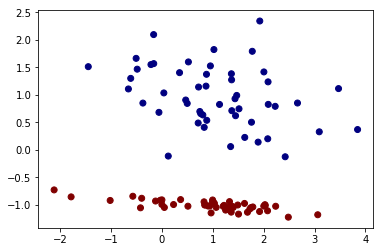

In [25]:
#visualiser un dataset d"une maniere informative


plt.scatter(x_train[:,0], x_train[:,1], 
            c = y_train[:, 0],
           cmap = plt.cm.jet)